In [93]:
import pandas as pd

In [94]:
df_fail_flights = pd.read_parquet("fail_flights_combined_data_selected_091.parquet")
df_fail_flights.head()

,recording_time,dateDay-1,dateMonth-1,dateYear-1,phaseOfFlight-1,message0418DAA-1,message0422DAA-1,amscHprsovDrivF-1a,amscHprsovDrivF-1b,amscHprsovDrivF-2b,...,bleedOnStatus-2b,bleedOverpressCas-2a,bleedOverpressCas-2b,bleedPrecoolDiffPress-1a,bleedPrecoolDiffPress-1b,bleedPrecoolDiffPress-2a,bleedPrecoolDiffPress-2b,bleedPrsovClPosStatus-1a,bleedPrsovClPosStatus-2a,bleedPrsovFbk-1a
0,0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
1,50,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,...,NaN,0.0,0.0,-128.0,-70.375,-128.0,26.3125,NaN,NaN,4.375
2,100,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN
3,150,1.0,1.0,0.0,NaN,4.0,4.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,200,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN


In [95]:
df_fail_flights["recording_time"]

0             0
1            50
2           100
3           150
4           200
          ...  
55304    964800
55305    964850
55306    964900
55307    964950
55308    965000
Name: recording_time, Length: 55309, dtype: int64

In [96]:
df_fail_flights["message0418DAA-1"].value_counts()


message0418DAA-1
4.0    1578
3.0    1164
0.0      23
Name: count, dtype: int64

In [97]:
df_fail_flights["message0422DAA-1"].value_counts()

message0422DAA-1
4.0    2742
0.0      23
Name: count, dtype: int64

In [98]:
df_fail_flights["phaseOfFlight-1"].value_counts()

phaseOfFlight-1
0.0    27660
Name: count, dtype: int64

In [99]:
for col in df_fail_flights.columns:
    print(col)

recording_time
dateDay-1
dateMonth-1
dateYear-1
phaseOfFlight-1
message0418DAA-1
message0422DAA-1
amscHprsovDrivF-1a
amscHprsovDrivF-1b
amscHprsovDrivF-2b
amscPrsovDrivF-1a
amscPrsovDrivF-1b
amscPrsovDrivF-2b
basBleedLowPressF-1a
basBleedLowPressF-2b
basBleedLowTempF-1a
basBleedLowTempF-2b
basBleedOverPressF-1a
basBleedOverPressF-2b
basBleedOverTempF-1a
basBleedOverTempF-2b
bleedFavTmCmd-1a
bleedFavTmCmd-1b
bleedFavTmCmd-2a
bleedFavTmCmd-2b
bleedFavTmFbk-1a
bleedFavTmFbk-1b
bleedFavTmFbk-2b
bleedHprsovCmdStatus-1a
bleedHprsovCmdStatus-1b
bleedHprsovCmdStatus-2a
bleedHprsovCmdStatus-2b
bleedHprsovOpPosStatus-1a
bleedHprsovOpPosStatus-1b
bleedHprsovOpPosStatus-2a
bleedHprsovOpPosStatus-2b
bleedMonPress-1a
bleedMonPress-1b
bleedMonPress-2a
bleedMonPress-2b
bleedOnStatus-1a
bleedOnStatus-1b
bleedOnStatus-2b
bleedOverpressCas-2a
bleedOverpressCas-2b
bleedPrecoolDiffPress-1a
bleedPrecoolDiffPress-1b
bleedPrecoolDiffPress-2a
bleedPrecoolDiffPress-2b
bleedPrsovClPosStatus-1a
bleedPrsovClPosSta

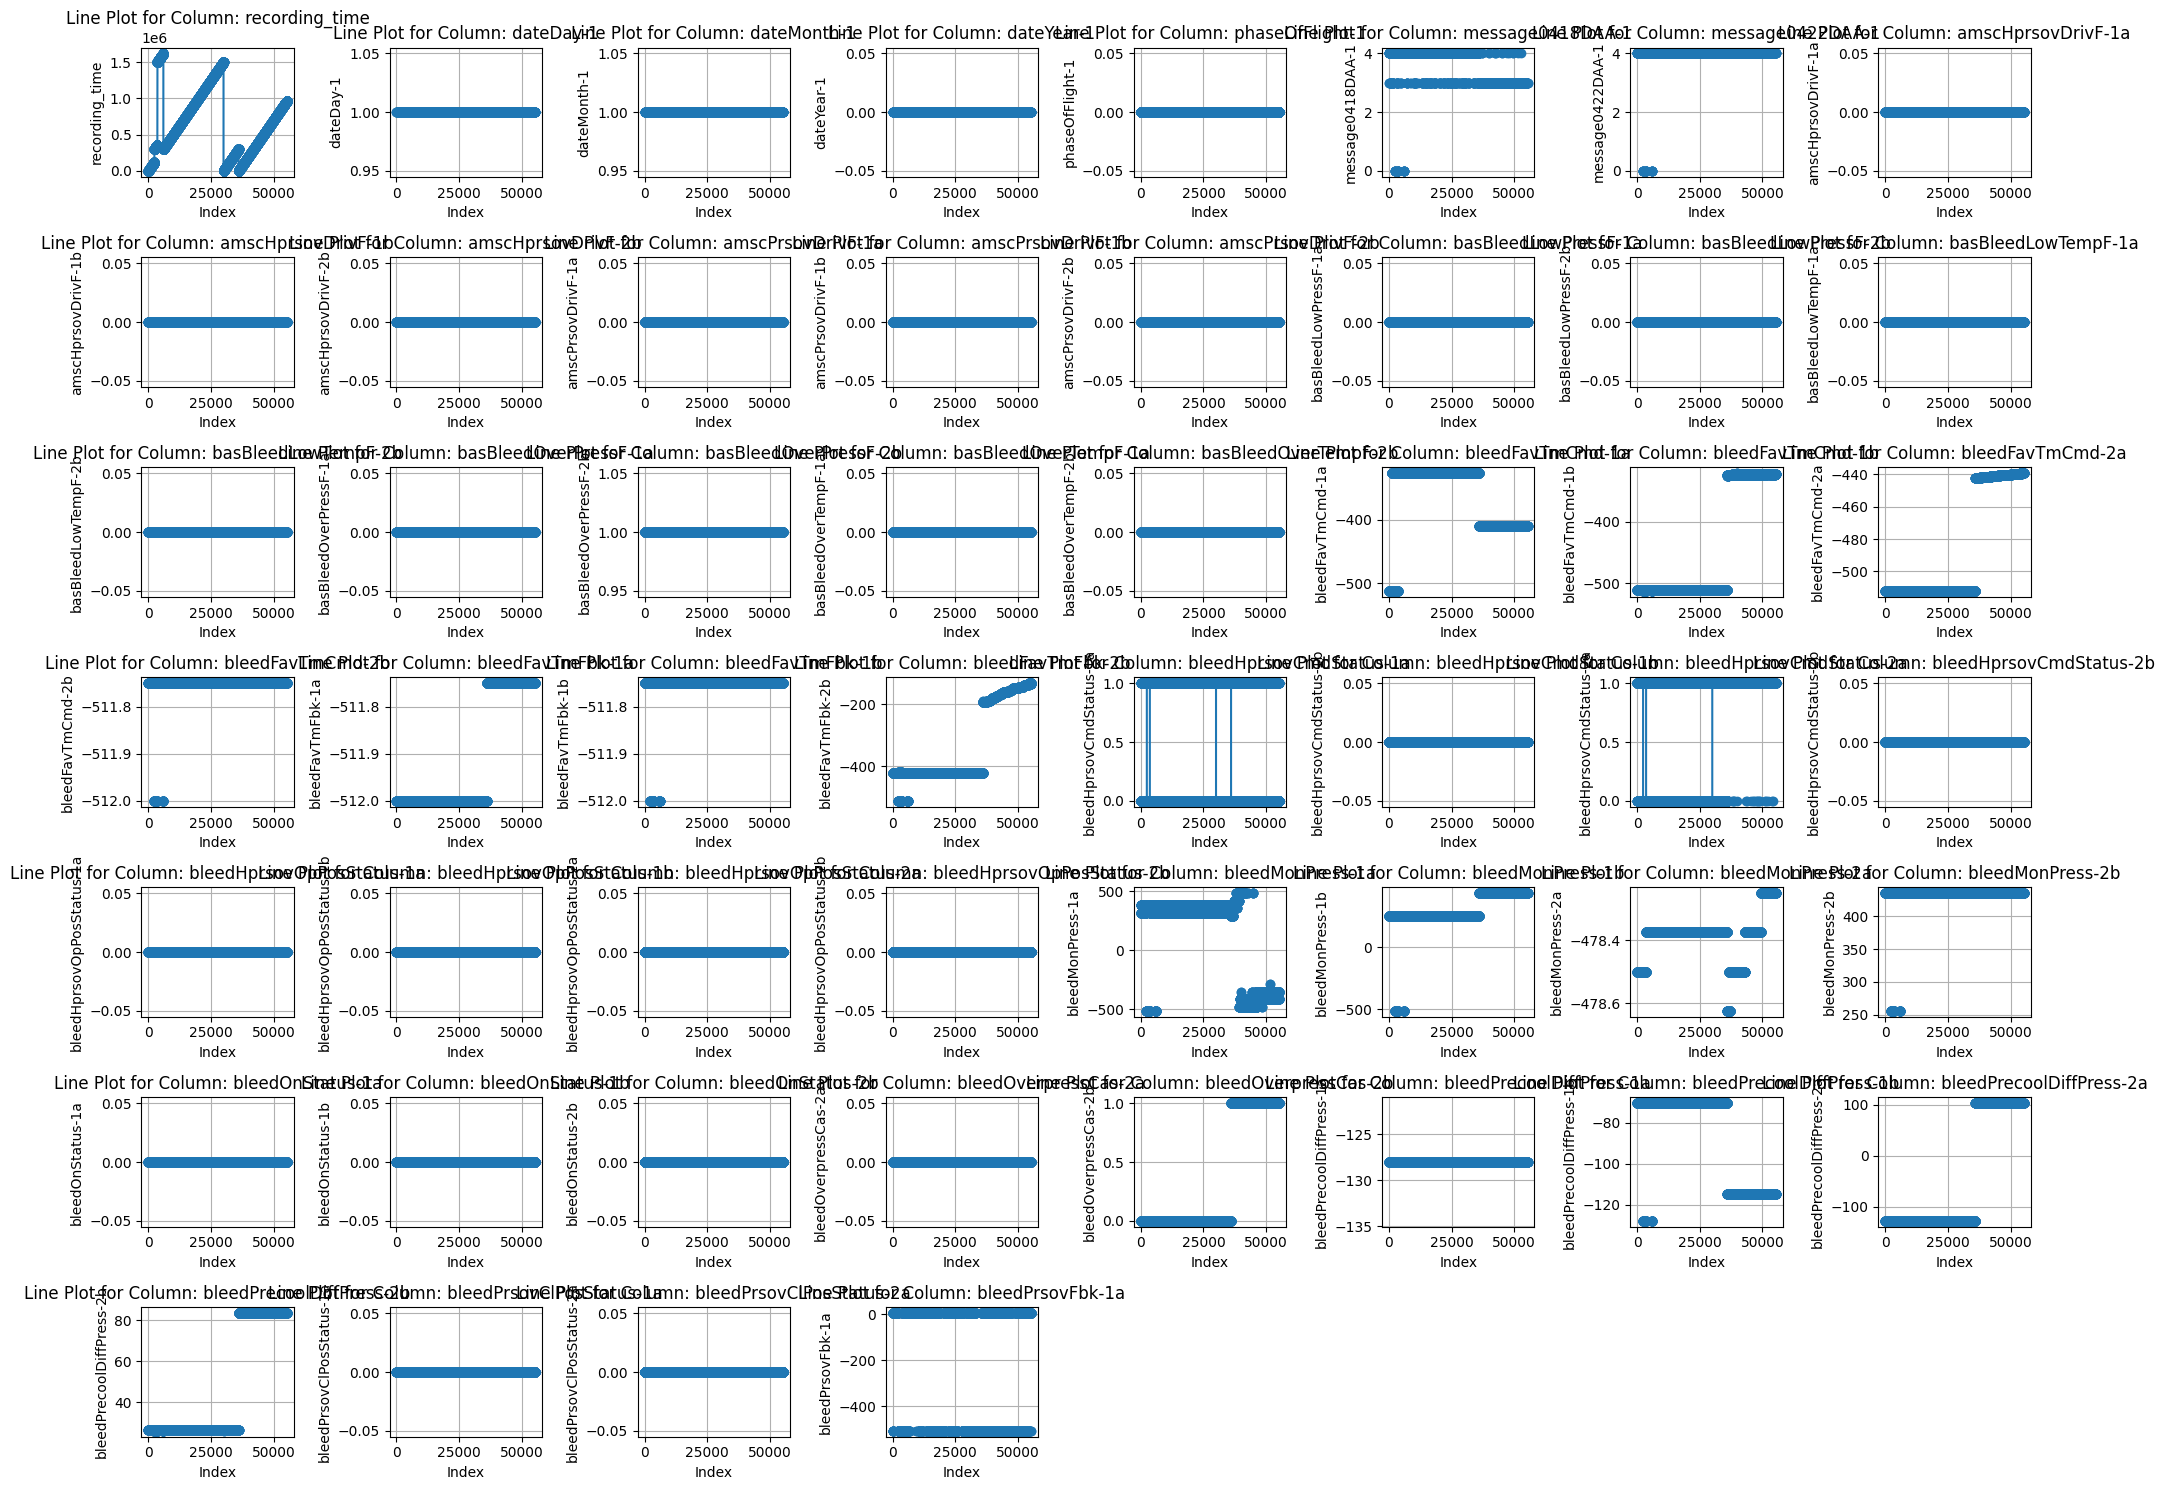

In [100]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_all_columns(dataframe, num_rows, num_cols, fig_name):
    num_plots = len(dataframe.columns)
    plot_index = 0
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
    
    for row in range(num_rows):
        for col in range(num_cols):
            if plot_index < num_plots:
                col_name = dataframe.columns[plot_index]
                ax = axes[row, col]
                
                try:
                    ax.plot(dataframe[col_name], marker='o')
                    ax.set_title(f'Line Plot for Column: {col_name}')
                    ax.set_xlabel('Index')
                    ax.set_ylabel(col_name)
                    ax.grid()
                except:
                    print(f'Could not plot for column: {col_name}')
                
                plot_index += 1
            else:
                axes[row, col].axis('off')

    plt.savefig(fig_name)
    
    plt.tight_layout()
    plt.show()

# Assuming df_fail_flights is your DataFrame
plot_all_columns(df_fail_flights, 7, 8, "all")


In [101]:
import pandas as pd

def drop_same_value_columns(dataframe):
    columns_to_drop = []

    for col in dataframe.columns:
        if dataframe[col].nunique() == 1:
            columns_to_drop.append(col)

    if columns_to_drop:
        for col in columns_to_drop:
            print(f"Column {col} will be dropped.")

        dataframe = dataframe.drop(columns=columns_to_drop)
        print(f"{len(columns_to_drop)} columns dropped.")

    return dataframe


df_variations = drop_same_value_columns(df_fail_flights)



Column dateDay-1 will be dropped.
Column dateMonth-1 will be dropped.
Column dateYear-1 will be dropped.
Column phaseOfFlight-1 will be dropped.
Column amscHprsovDrivF-1a will be dropped.
Column amscHprsovDrivF-1b will be dropped.
Column amscHprsovDrivF-2b will be dropped.
Column amscPrsovDrivF-1a will be dropped.
Column amscPrsovDrivF-1b will be dropped.
Column amscPrsovDrivF-2b will be dropped.
Column basBleedLowPressF-1a will be dropped.
Column basBleedLowPressF-2b will be dropped.
Column basBleedLowTempF-1a will be dropped.
Column basBleedLowTempF-2b will be dropped.
Column basBleedOverPressF-1a will be dropped.
Column basBleedOverPressF-2b will be dropped.
Column basBleedOverTempF-1a will be dropped.
Column basBleedOverTempF-2b will be dropped.
Column bleedHprsovCmdStatus-1b will be dropped.
Column bleedHprsovCmdStatus-2b will be dropped.
Column bleedHprsovOpPosStatus-1a will be dropped.
Column bleedHprsovOpPosStatus-1b will be dropped.
Column bleedHprsovOpPosStatus-2a will be dro

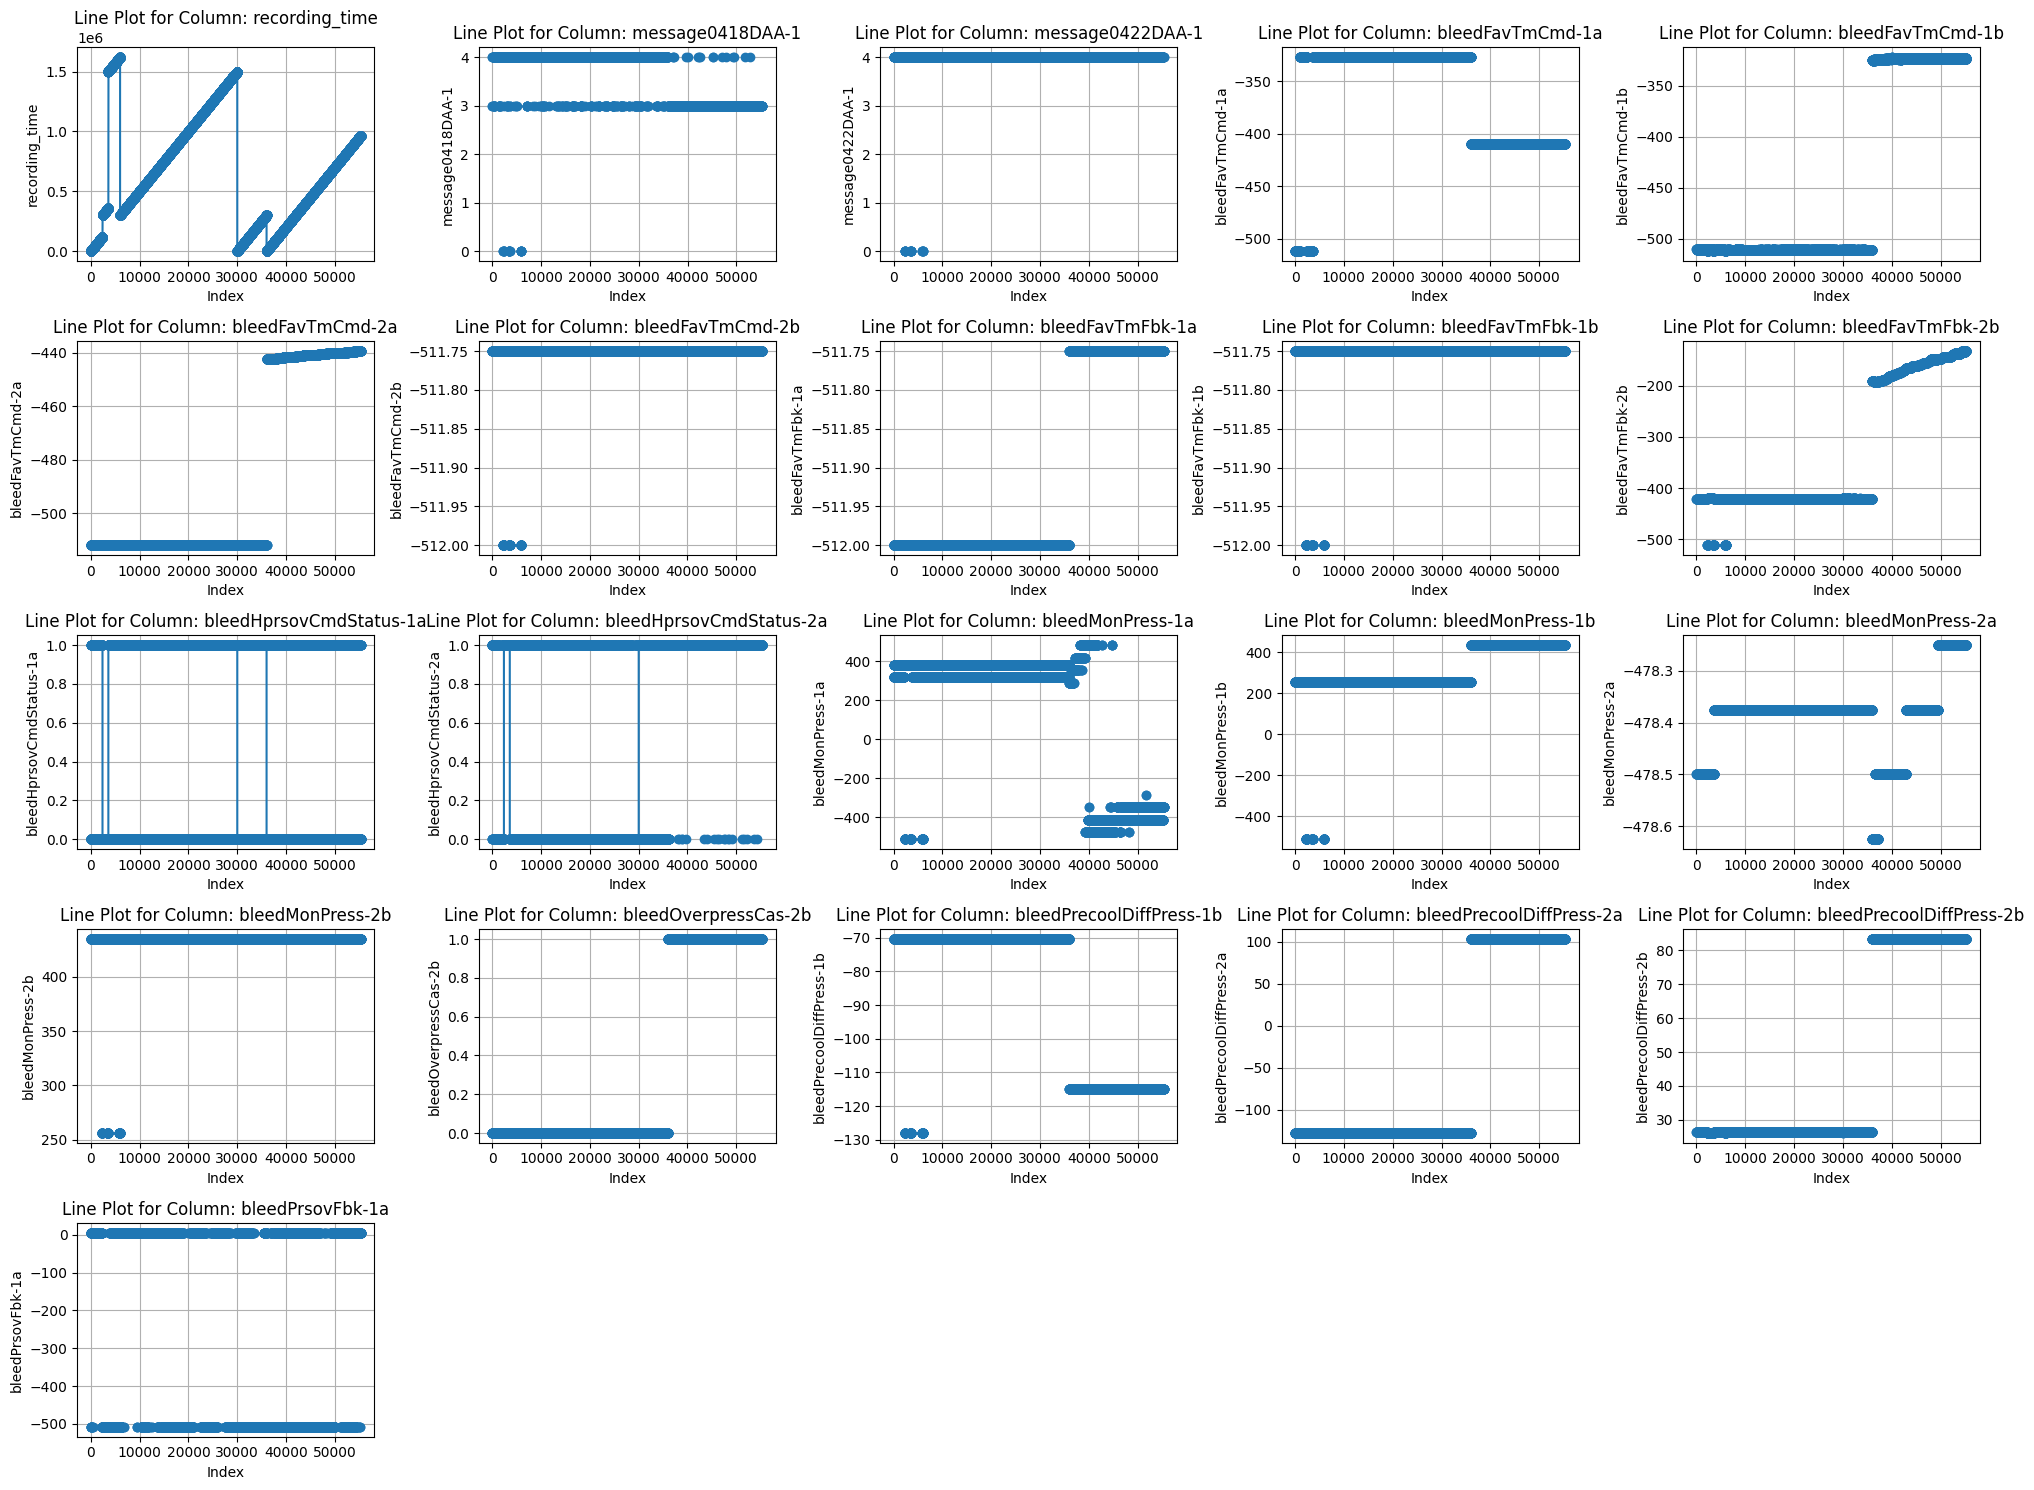

In [102]:

plot_all_columns(df_variations, 5, 5, "time_series_plots.png")
plt.show()

In [103]:
analysis_cols = ["bleedFavTmCmd-1b", "bleedFavTmCmd-2a", "bleedFavTmFbk-1a", "bleedFavTmFbk-2b", "bleedMonPress-1b", "bleedMonPress-2a", "bleedOverpressCas-2b", "bleedPrecoolDiffPress-1b", "bleedPrecoolDiffPress-2a", "bleedPrecoolDiffPress-2b"]

In [104]:
df_analysis = df_variations[analysis_cols]

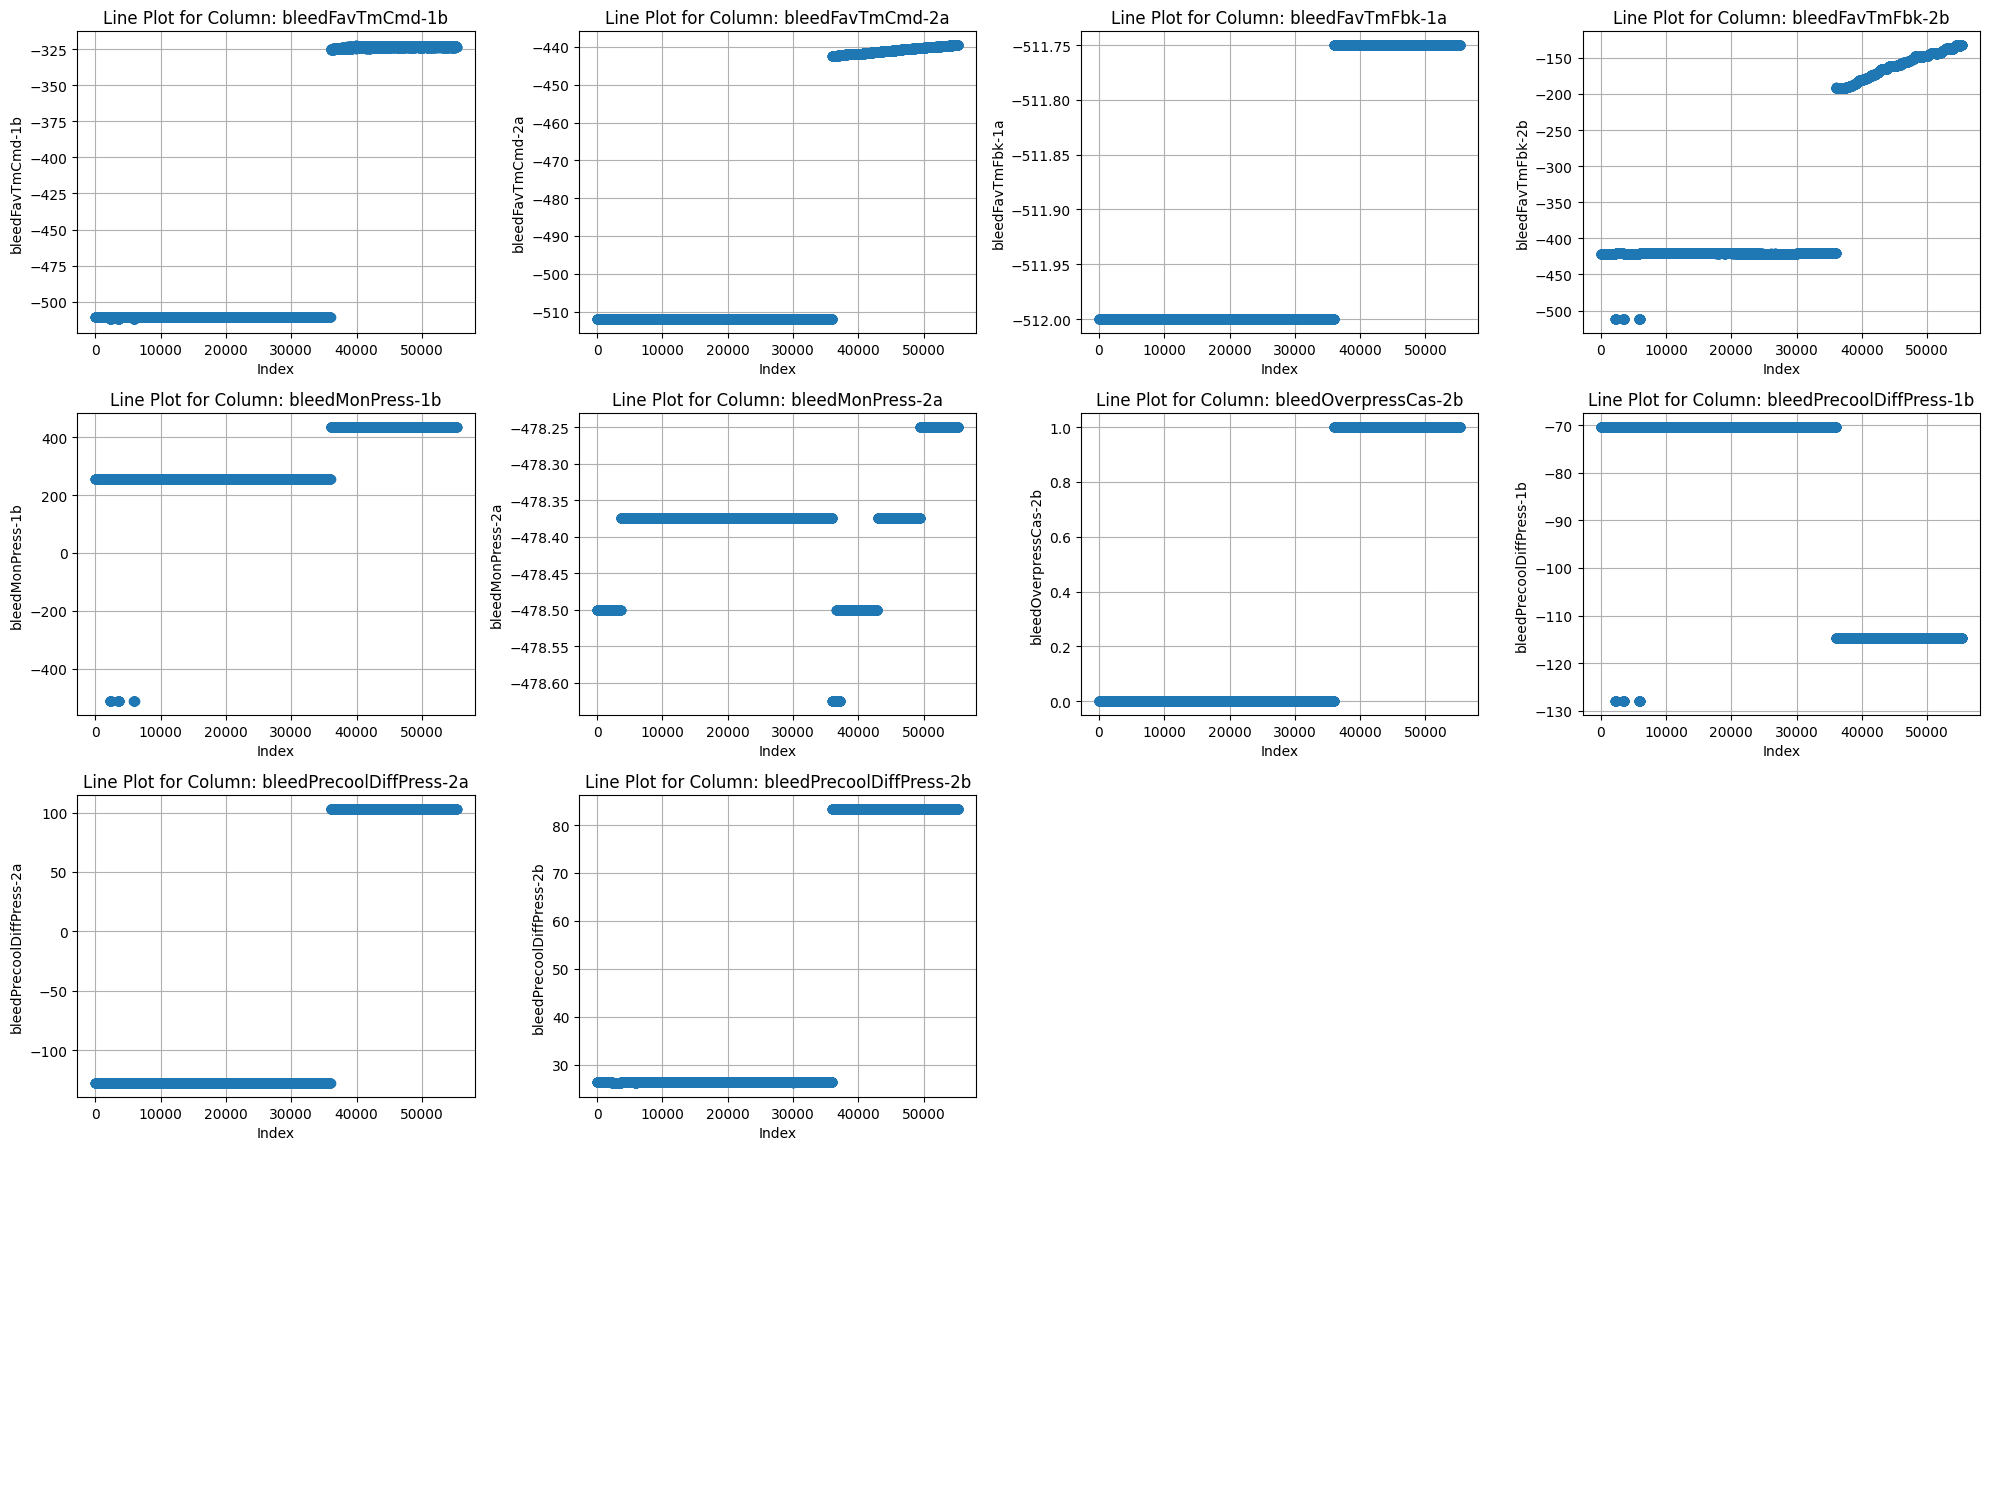

In [105]:

plot_all_columns(df_analysis, 4, 4, "analysis.png")
plt.show()

In [107]:
for col in df_fail_flights.columns:
    print(col)

recording_time
dateDay-1
dateMonth-1
dateYear-1
phaseOfFlight-1
message0418DAA-1
message0422DAA-1
amscHprsovDrivF-1a
amscHprsovDrivF-1b
amscHprsovDrivF-2b
amscPrsovDrivF-1a
amscPrsovDrivF-1b
amscPrsovDrivF-2b
basBleedLowPressF-1a
basBleedLowPressF-2b
basBleedLowTempF-1a
basBleedLowTempF-2b
basBleedOverPressF-1a
basBleedOverPressF-2b
basBleedOverTempF-1a
basBleedOverTempF-2b
bleedFavTmCmd-1a
bleedFavTmCmd-1b
bleedFavTmCmd-2a
bleedFavTmCmd-2b
bleedFavTmFbk-1a
bleedFavTmFbk-1b
bleedFavTmFbk-2b
bleedHprsovCmdStatus-1a
bleedHprsovCmdStatus-1b
bleedHprsovCmdStatus-2a
bleedHprsovCmdStatus-2b
bleedHprsovOpPosStatus-1a
bleedHprsovOpPosStatus-1b
bleedHprsovOpPosStatus-2a
bleedHprsovOpPosStatus-2b
bleedMonPress-1a
bleedMonPress-1b
bleedMonPress-2a
bleedMonPress-2b
bleedOnStatus-1a
bleedOnStatus-1b
bleedOnStatus-2b
bleedOverpressCas-2a
bleedOverpressCas-2b
bleedPrecoolDiffPress-1a
bleedPrecoolDiffPress-1b
bleedPrecoolDiffPress-2a
bleedPrecoolDiffPress-2b
bleedPrsovClPosStatus-1a
bleedPrsovClPosSta

In [113]:
df_analysis["message0422DAA-1"] = df_fail_flights["message0422DAA-1"]

df_analysis["message0422DAA-1"].value_counts()


C:\Users\Inteli\AppData\Local\Temp\ipykernel_20680\150000652.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_analysis["message0422DAA-1"] = df_fail_flights["message0422DAA-1"]


message0422DAA-1
4.0    2742
0.0      23
Name: count, dtype: int64

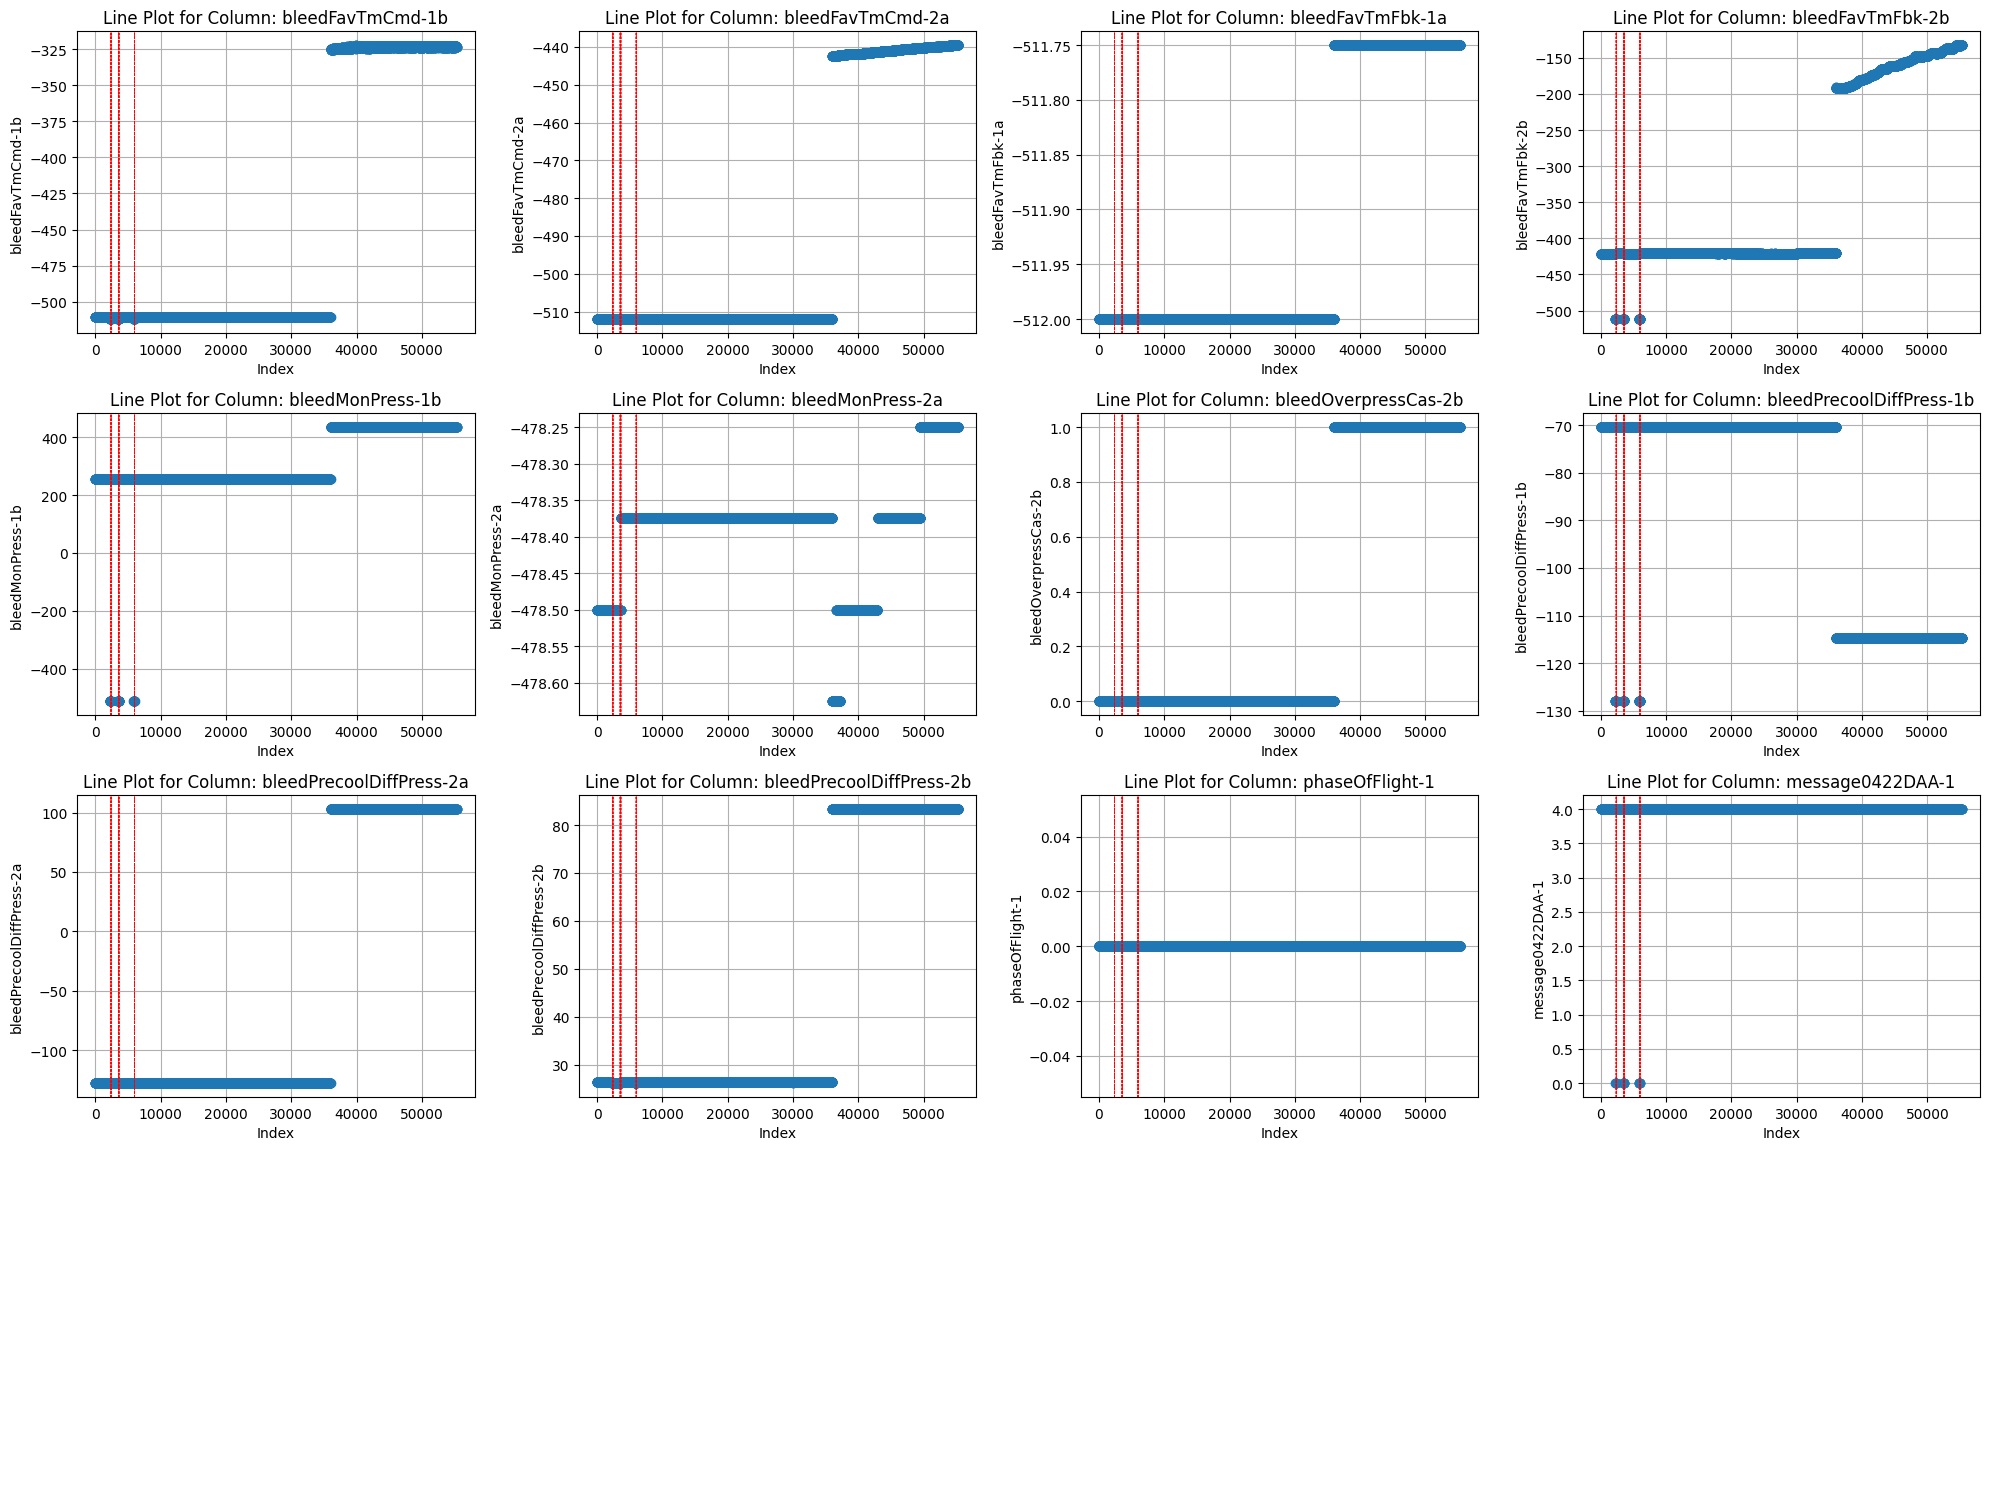

In [117]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_with_vertical_line(dataframe):
    num_plots = len(dataframe.columns)
    num_rows = 4
    num_cols = 4
    plot_index = 0
    
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, 15))
    
    for row in range(num_rows):
        for col in range(num_cols):
            if plot_index < num_plots:
                col_name = dataframe.columns[plot_index]
                ax = axes[row, col]
                
                try:
                    ax.plot(dataframe[col_name], marker='o')

                    # Get values from "message0422DAA-1" column
                    color_values = dataframe['message0422DAA-1']
                    
                    for i in range(len(color_values)):
                        if color_values[i] == 0:
                            ax.axvline(x=i, color='red', linestyle='--', linewidth=0.5)
                    
                    ax.set_title(f'Line Plot for Column: {col_name}')
                    ax.set_xlabel('Index')
                    ax.set_ylabel(col_name)
                    ax.grid()
                except:
                    print(f'Could not plot for column: {col_name}')
                
                plot_index += 1
            else:
                axes[row, col].axis('off')
    
    plt.tight_layout()
    plt.show()


# Call the function to plot with vertical red dashed lines
plot_with_vertical_line(df_analysis)
